# [1. 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning - 이유한](https://kaggle-kr.tistory.com/17?category=868316#1)

- 타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성이 주 목표
- 시각화 도구 matplotlib, seaborn, plotly
- 데이터 분석 도구 pandas, numpy
- 머신러닝 도구 sklearn

#### 데이터 분석의 과정 

##### 1. 데이터셋 확인 - null data 존재하는지 확인하고 향후 수정한다. 
##### 2. 탐색적 데이터 분석 (EDA) - 여러 feature들을 개별적으로 분석, feature 간의 상관관계를 확인.  여러 시각화 툴을 사용하여 insight를 얻는다.
##### 3. Feature Engineering - 모델을 세우기 전 모델의 성능을 높이기 위한 과정 ( One-Hot Encoding, class로 나누기, 구간 나누기 , 텍스트 데이터 처리 등)
##### 4. model 생성 - sklearn을 이용하여 모델을 생성한다. 딥러닝 - tensorflow, pytorch 등 사용 
##### 5. 모델 학습 및 예측 - train set을 가지고 모델을 학습시킨 후 , test set 을 가지고 예측한다.
##### 6. 모델 평가 - 예측 성능이 원하는 수준인지 판단. 풀려는 문제에 따라 모델을 평가하는 방식이 달라지고 학습된 모델이 어떤 것을 학습하였는지 확인해본다. 


In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
#matplotlib의 scheme말고 seaborn scheme 세팅 
#일일히 graph font size 지정할 필요 없이 font_scale을 사용하여 편하게 사이즈 조정

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. DATASET 확인

#### - 파이썬에서 테이블화 된 데이터를 다루는데 가장 최적화
#### - pandas가 가장 많이 사용되어지고 있다.
#### - pandas를 이용한 간단한 통계적 분석부터 간단한 메소드를 사용하여 복잡한 처리들을 해내는 과정 수행 
#### - 캐글에서 데이터 셋은 train / test 두가지로 나뉘어 있다.  

In [603]:
df_train= pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

 -df_train = pd.read_csv('../input/train.csv')  
 -df_test = pd.read_csv('../input/test.csv')  
##### - 해당 폴더에 있을 경우 ('./데이터셋.') 으로 하면 되는 것 같다. 

In [604]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 우리가 다루는 문제(test)에서 feature는 Pclass, Age, Sibsp, Parch, Fare 예측하려는 target label은 Survived (생존자) 이다.  
(순서대로 티켓 클래스, 나이, 형제와 배우자의 수, 함께 탑승한 아이와 부모의 수 , 탑승료)

In [605]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [606]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 판다스의 describe() 메소드는 각 feature가 가진 통계치(N,mean,std,min,max,사분위수) 를 반환해준다.
- 위 두 테이블에서 PassengerID와 count수가 다른 null data 값이 존재하는 feature가 존재한다는 것을 확인할 수 있다. 
- 시각화를 통해 자세히 알아보자.

### 1.1 NULL DATA CHECK

In [607]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value : 0.00%
column:   Survived	 Percent of NaN value : 0.00%
column:     Pclass	 Percent of NaN value : 0.00%
column:       Name	 Percent of NaN value : 0.00%
column:        Sex	 Percent of NaN value : 0.00%
column:        Age	 Percent of NaN value : 19.87%
column:      SibSp	 Percent of NaN value : 0.00%
column:      Parch	 Percent of NaN value : 0.00%
column:     Ticket	 Percent of NaN value : 0.00%
column:       Fare	 Percent of NaN value : 0.00%
column:      Cabin	 Percent of NaN value : 77.10%
column:   Embarked	 Percent of NaN value : 0.22%


In [608]:
for col in df_test.columns:
    msg = 'columns: {:>10}\t Percent of NaN value : {:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value : 0.00%
columns:     Pclass	 Percent of NaN value : 0.00%
columns:       Name	 Percent of NaN value : 0.00%
columns:        Sex	 Percent of NaN value : 0.00%
columns:        Age	 Percent of NaN value : 20.57%
columns:      SibSp	 Percent of NaN value : 0.00%
columns:      Parch	 Percent of NaN value : 0.00%
columns:     Ticket	 Percent of NaN value : 0.00%
columns:       Fare	 Percent of NaN value : 0.24%
columns:      Cabin	 Percent of NaN value : 78.23%
columns:   Embarked	 Percent of NaN value : 0.00%


- Train, Test DataSet에서 Age(약 20%)와 Cabin(약 80%), Embarked(Train 약 0.22%), Fare(Test 약 0.24%)에 Null Data가 존재한다는 것을 알 수 있다.

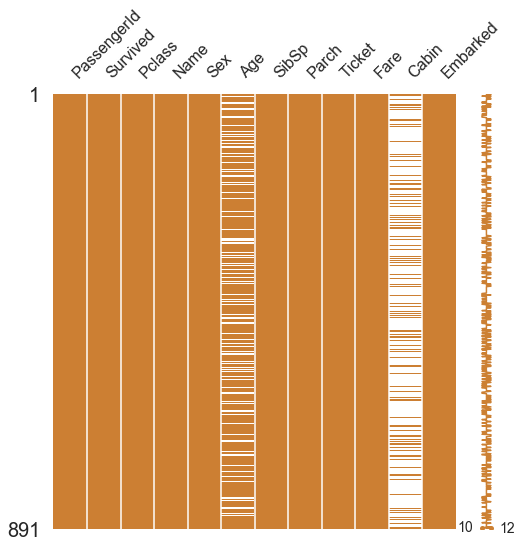

In [609]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

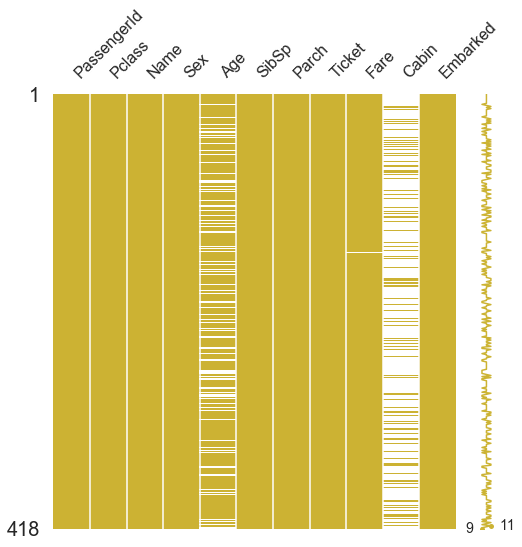

In [610]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8),color=(0.8, 0.7,0.2))

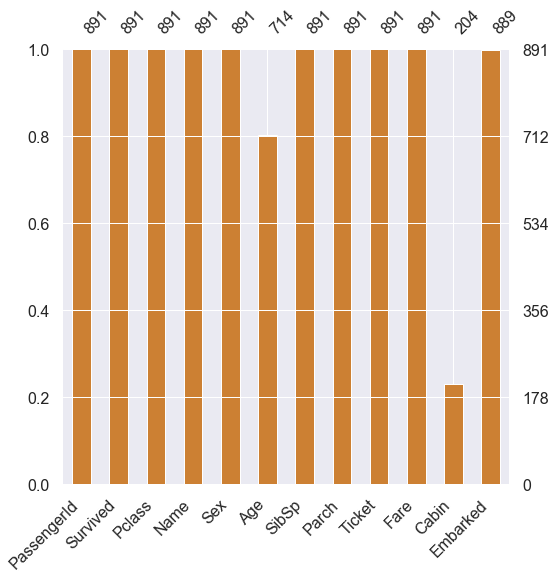

In [611]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

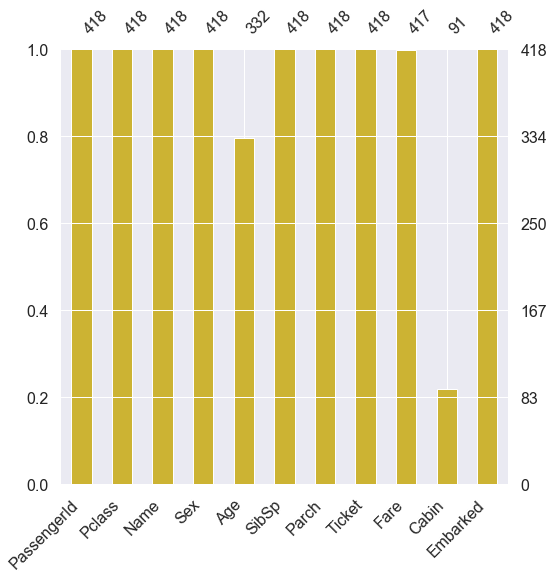

In [612]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.7, 0.2))

MANO라는 라이브러리를 사용하면 Null Data의 존재를 더 쉽게 확인할 수 있다.

### 1.2 Target Label 확인
- Target label이 어떤 분포(distribution)을 가지고 있는지 확인해야 한다.
- 지금 같은 binary classfication 문제의 경우에서 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라질 수 있다. 

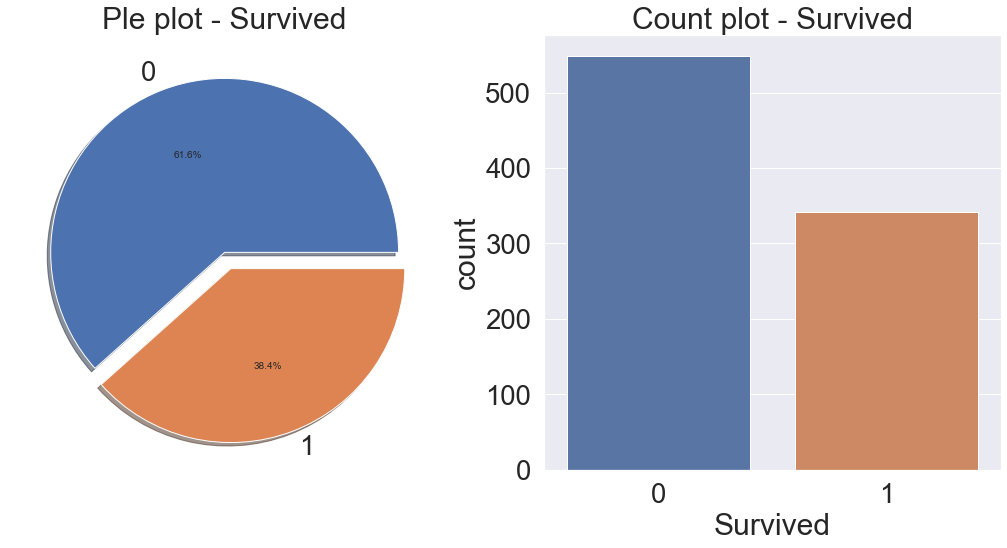

In [613]:
f, ax = plt.subplots(1,2, figsize=(18,8))

#파이차트 생성
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%',ax=ax[0], shadow=True)
#train데이터의 생존자의 수를 세어 파이플랏으로 나타낸다 (옵션 = 파이띄우기 정도 , 퍼센트 표시, 표, 그림자 표시여부)
ax[0].set_title('Ple plot - Survived')
ax[0].set_ylabel('')
# 타이틀과 ylabel 설정 

#0 과 1 카운트 그래프 생성 
sns.countplot('Survived', data=df_train, ax=ax[1]) #sns 는 seaborn 
#feature 내 데이터 개수를 세어 그래프로 표시
ax[1].set_title('Count plot - Survived')

plt.show()



- 0이 사망 1이 생존
- 사망자 수가 61.6%
- target label의 분포가 제법 균일하다고 한다. 불균일한 경우에는 다른 조치가 필요하다. 
- 그래프상으로 이상 없으니 계속 진행한다.

### 2. Exploratory Data Analysis (EDA)
- 본격적인 데이터 분석 수행을 위해 데이터의 적절한 시각화가 필요하다.
- matplotlib, seaborn, plotly 등의 시각화 라이브러리를 특정 목적에 알맞게 사용한다.

### 2.1 Pclass 
- Feature Pclass에 대해 살펴본다. Pclass는 서수형데이터, 범주형데이터, 순서형데이터이다.
- 제일 먼저 Pclass에 따른 생존률의 차이를 알아보려고 한다. 엑셀의 피벗차트와 유사한 작업으로 pandas dataframe의 groupby를 사용하여 데이터를 살펴본다. pivot도 사용가능하다.
- 'Pclass', 'Survived'를 가져온 후, pclass로 묶는다. 그런 다음 카운트된 각 Pclass의 0,1 개수를 평균내어 pclass별 생존률을 계산한다.
- count()를 하여 각 class에 몇 명이 있는 지 확인할 수 있으며, sum()을 하여 216명중 생존자 수의 총합계를 받는다.

In [614]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [615]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- 위 과정을 pandas의 crosstab을 사용하면 좀 더 위 과정을 훨씬 수월하게 수행할 수 있다.

In [616]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- grouped된 객체에 mean()을 하게 되면, 각 클래스별 생존률을 얻을 수 있다.

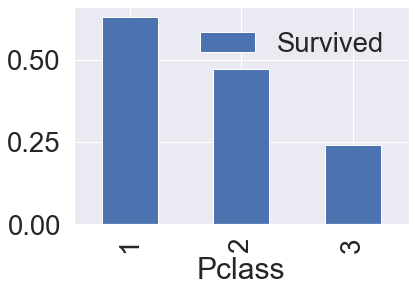

In [617]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

In [618]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- Pclass가 1st일수록 생존률이 높다는 것을 확인할 수 있다.  
Pclass 1st, 2nd, 3rd 순서대로 63%, 48%, 25%
- 좀 더 보기 쉽게 그래프를 그리기위해서는 seaborn의 countplot을 이용하면 특정 label에 따른 개수를 확인해볼 수 있다. 

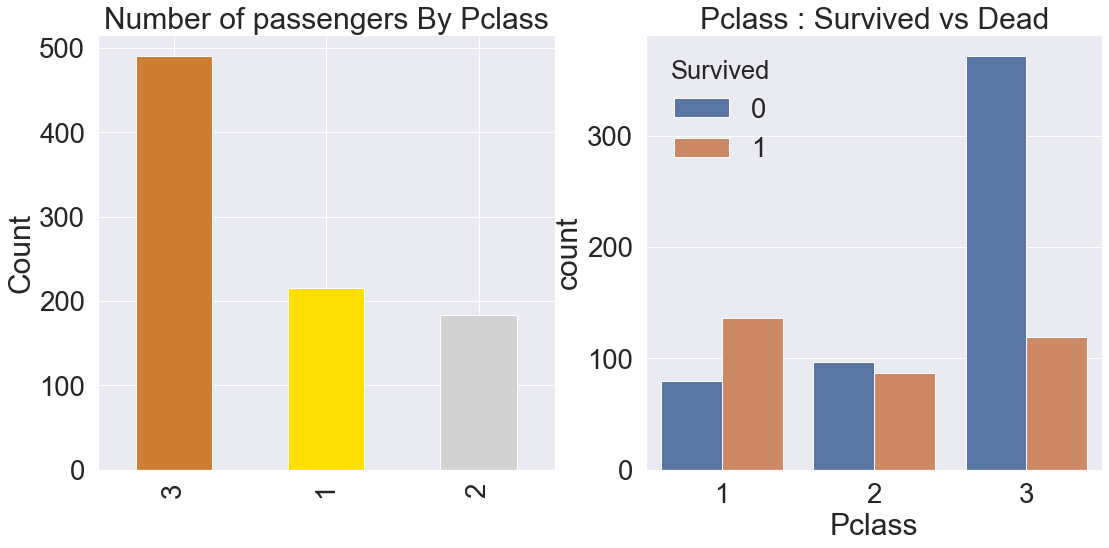

In [619]:
y_position=1.
#타이들과 차트 사이의 간격 결정 
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7E32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1]) #티켓 클래스별 Survived 데이타 값 (0,1)에 대한 갯수 
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)

plt.show()

- 생존에 Pclass가 큰 영향을 미친다고 판단 가능, 차후 모델 생성 시 이 Feature를 사용하는 것이 좋을 것 같다.

2021/02/10 1차 필사 (1.1~2.2)  
추가로 찾아볼 것
 - column 별 데이터타입 산출
 - Pclass 생존률 표시하는 방법
 - sns.countplot(data=데이터이름, x="컬럼1", hue="컬럼2")

1. df.info() 로 데이터들의 정보 확인(문자인지 숫자인지 소수점인지)  
object : 문자값 / int64 : 숫자 / float64 : 소수점 포함 값 



In [620]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [621]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


2. groupby 객체에 mean()을 적용하면 클래스별 생존률을 확인할 수 있다

In [622]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 2.2 SEX
- 성별에 따른 생존률의 변화를 확인하는 작업 수행
- pandas groupby와 seaborn countplot 을 사용하여 시각화

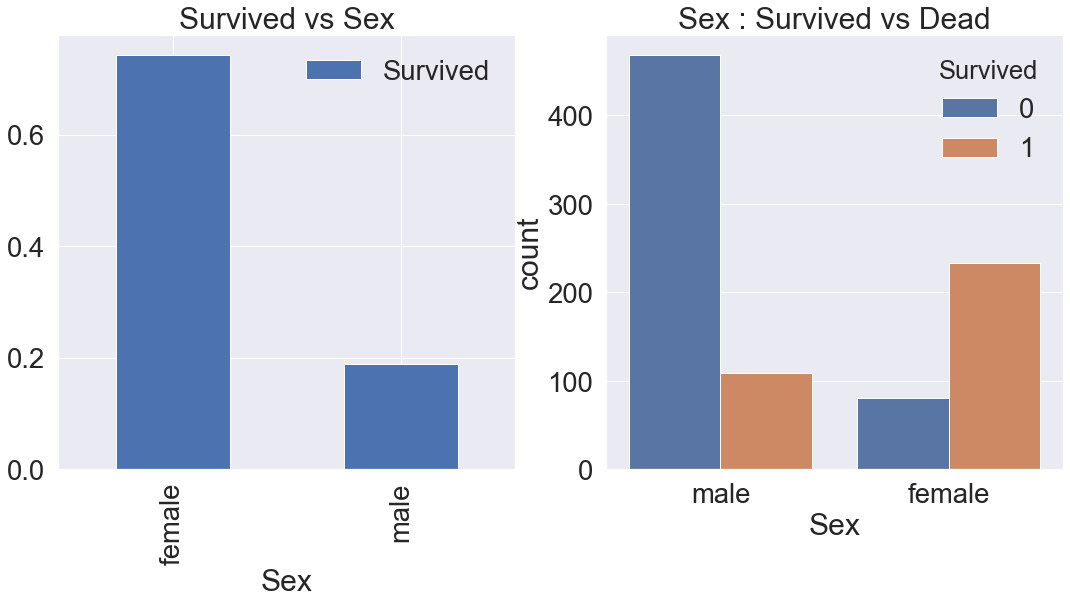

In [623]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

- 여자의 생존률이 높았다

In [624]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)
#각 성별의 Survived 평균을 구하고 출력
#as_index로 index 값을 표시할건지 아닌지 설정

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [625]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='spring_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로 Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있었다.

### 2.3 BOTH SEX AND PCLASS
- 이번에는 Sex, Pclass 두 가지에 관하여 생존이 어떻게 달라지는 지 확인해본다.
- Seaborn의 factorplot을 이용하면 손쉽게 3차원으로 이루어진 그래프를 그릴 수 있다.

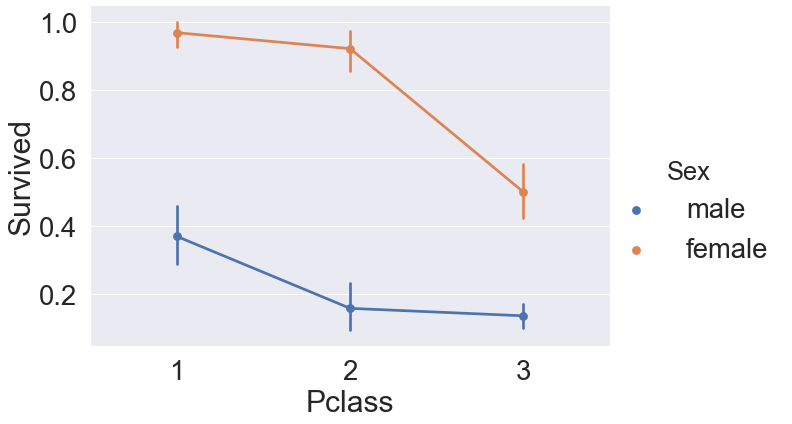

In [626]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

- 모든 클래스에서 여성이 살아남을 확률이 남성보다 높다는 것을 알 수 있다. 
- 클래스가 1에 가까울수록 (1st) 살아남을 확률이 높다. 
- hue 대신 column으로 하면 좀 더 세분화하여 판단할 수 있다.

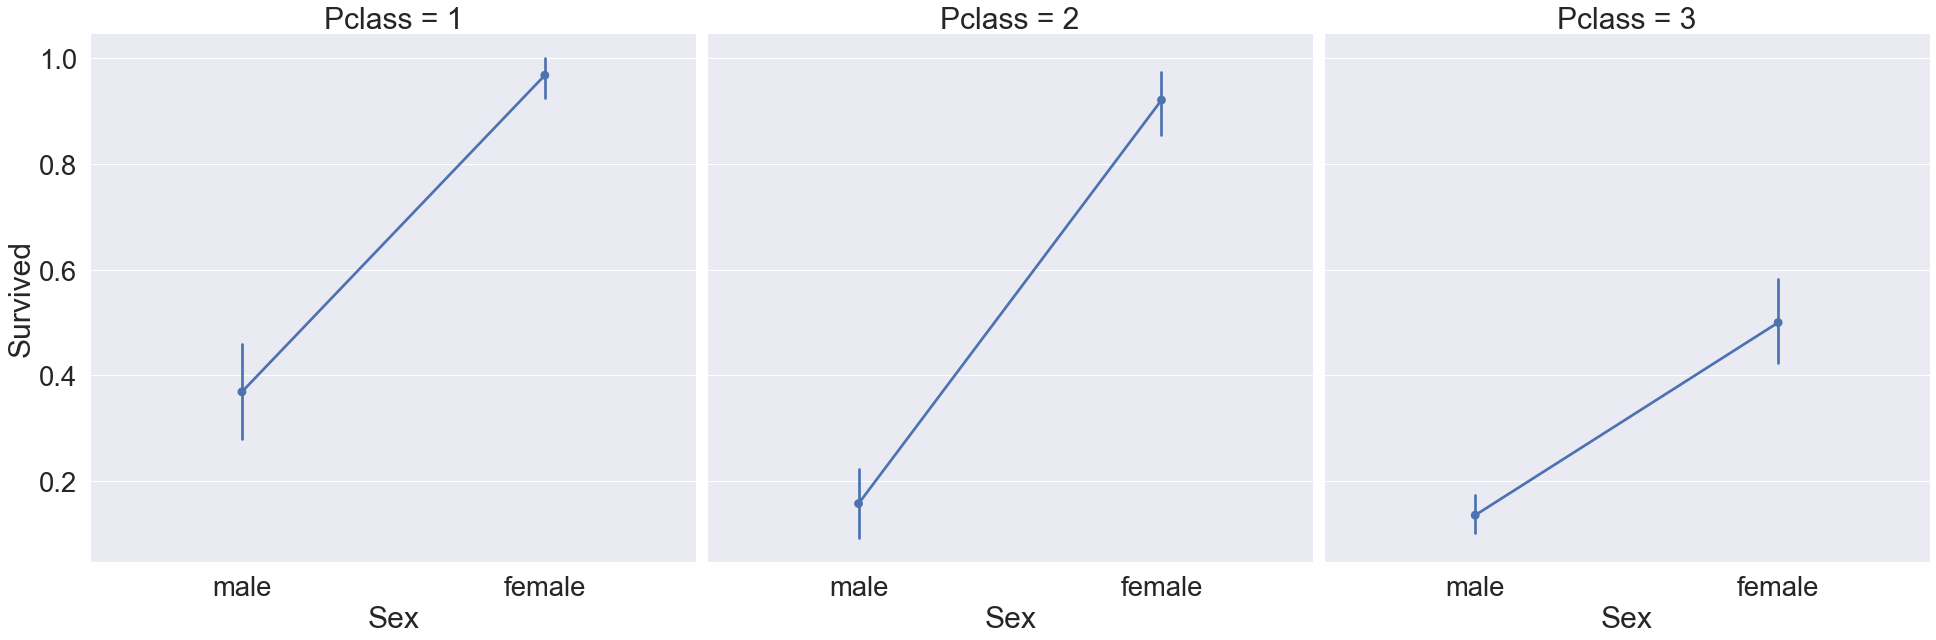

In [627]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,satureation=.5,size=9,aspect=1)

- Pclass가 높을수록 성별이 여성인 사람일수록 생존 확률이 높다는 것을 알 수 있었다.

### 2.4 AGE
- 이번에는 Age feature를 살펴보도록 하자.

In [628]:
print('제일 나이 많은 탑승객 :{:.1f} Years '.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 :{:.1f} Years '.format(df_train['Age'].min()))
print('탑승객의 평균 나이 :{:.1f} Years '.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :80.0 Years 
제일 나이 적은 탑승객 :0.4 Years 
탑승객의 평균 나이 :29.7 Years 


- 생존에 따른 Age의 histogram 생성
 - seaborn kdeplot으로 histogram생성

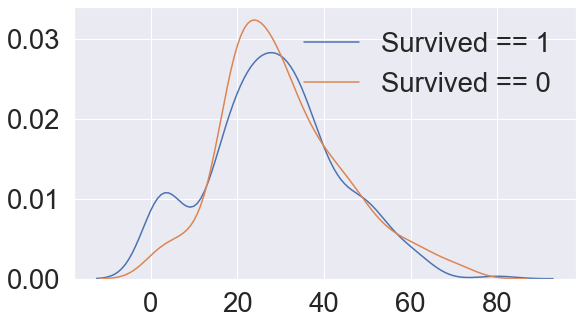

In [629]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'],ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)

plt.legend(['Survived == 1','Survived == 0'])
plt.show()

- 생존자 중에서는 나이가 어린 사람이 존재했었다는 것을 알 수 있었다.

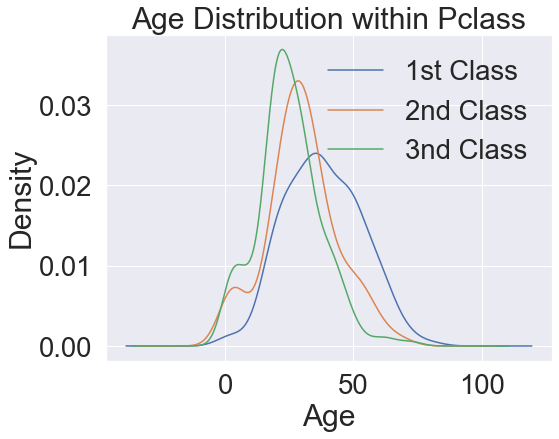

In [630]:
#Pclass 별 생존자 나이 분포 살펴보기 
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')


plt.xlabel('Age')
plt.title("Age Distribution within Pclass")
plt.legend(['1st Class','2nd Class', '3nd Class'])

 - Class가 높을수록 나이가 많은 사람의 비중이 커진다.
 - 나이대에 따른 생존률의 변화에 대해 알아보고자 한다.
 - 나이범위를 점점 넓혀가는 방법으로 생존률의 변화를 알아본다.

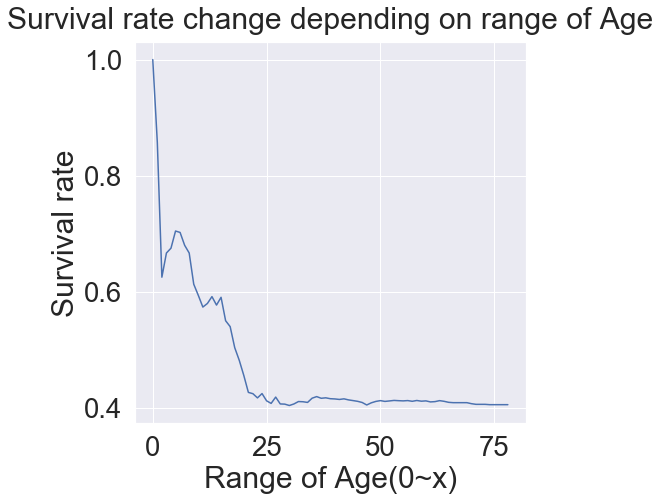

In [631]:
survival_ratio =[]
for i in range(1,80):
    survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

    
plt.figure(figsize=(7,7))
plt.plot(survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

plt.show()

- 나이가 어릴수록 생존률이 높다는 것을 확인할 수 있었다.
- Age가 중요한 feature로 쓰일 수 있다는 것을 확인하였다.

### 2.5 PCLASS, SEX, AGE
- 지금까지 본 Sex,Pclass, Age, Survived 모두에 대한 그래프를 그리고 판단한다. Seaborn의 violinplot을 활용한다.
- x축은 우리가 나눠서 보고싶어하는 case(Pclass,Sex)를 나타내고 y축은 보고싶어하는 분포(Age)이다.

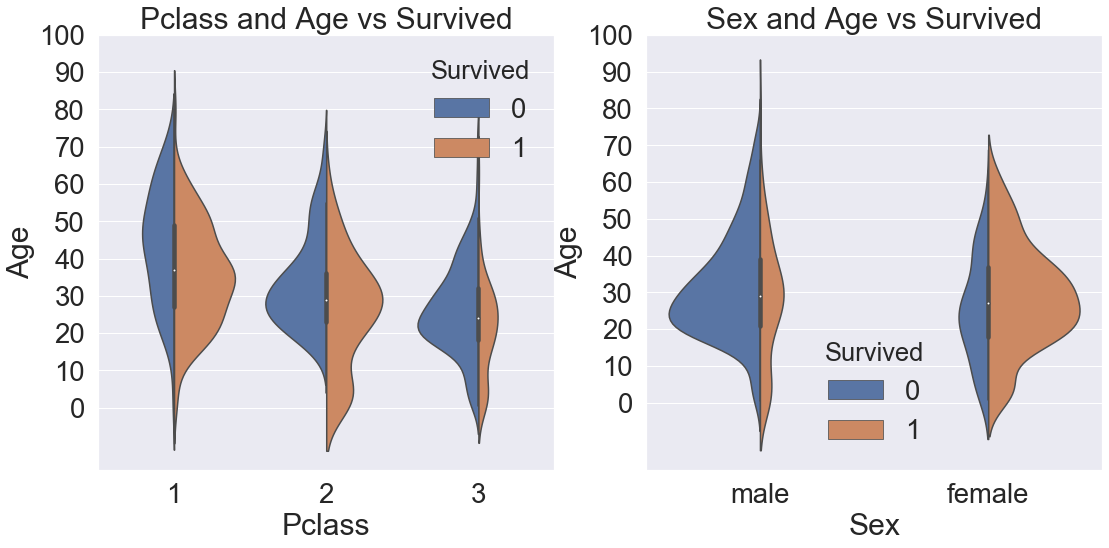

In [632]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=df_train,scale='count',split=True, ax=ax[0])
sns.violinplot("Sex","Age",hue="Survived",data=df_train,scale='count',split=True, ax=ax[1])

ax[0].set_title('Pclass and Age vs Survived')
ax[1].set_title('Sex and Age vs Survived')

ax[0].set_yticks(range(0,110,10))
ax[1].set_yticks(range(0,110,10))

plt.show()

- 왼쪽 그림은 Plass별 Age의 생존 여부 분포이며 오른쪽 그림은 Sex별 Age의 생존 여부 분포이다.
- 생존 여부만 보았을 때는 모든 클래스에서 나이가 어린 사람들의 생존률이 높은 것으로 나타난다.
- 여성과 아이의 생존률이 높은 것을 보아 그들을 먼저 챙겨 구조한 것으로 보인다.

### 2.6 EMBARKED
- Enbarked는 탑승한 항구를 나타낸다.
- 탑승한 곳에 따른 생존률 변화를 살펴본다.

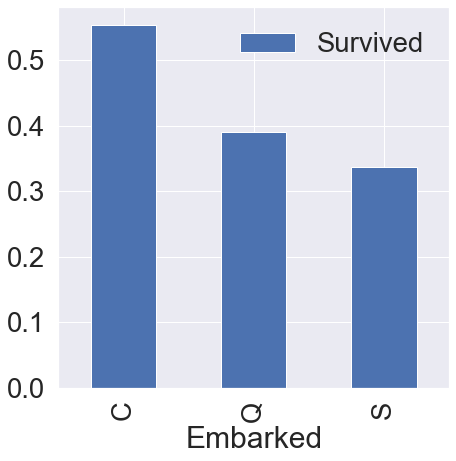

In [633]:
f , ax= plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 조금의 차이는 있지만 생존률은 크게 차이가 나지 않는 것으로 판단됨. 굳이 차이가 있다면 C가 가장 높다.

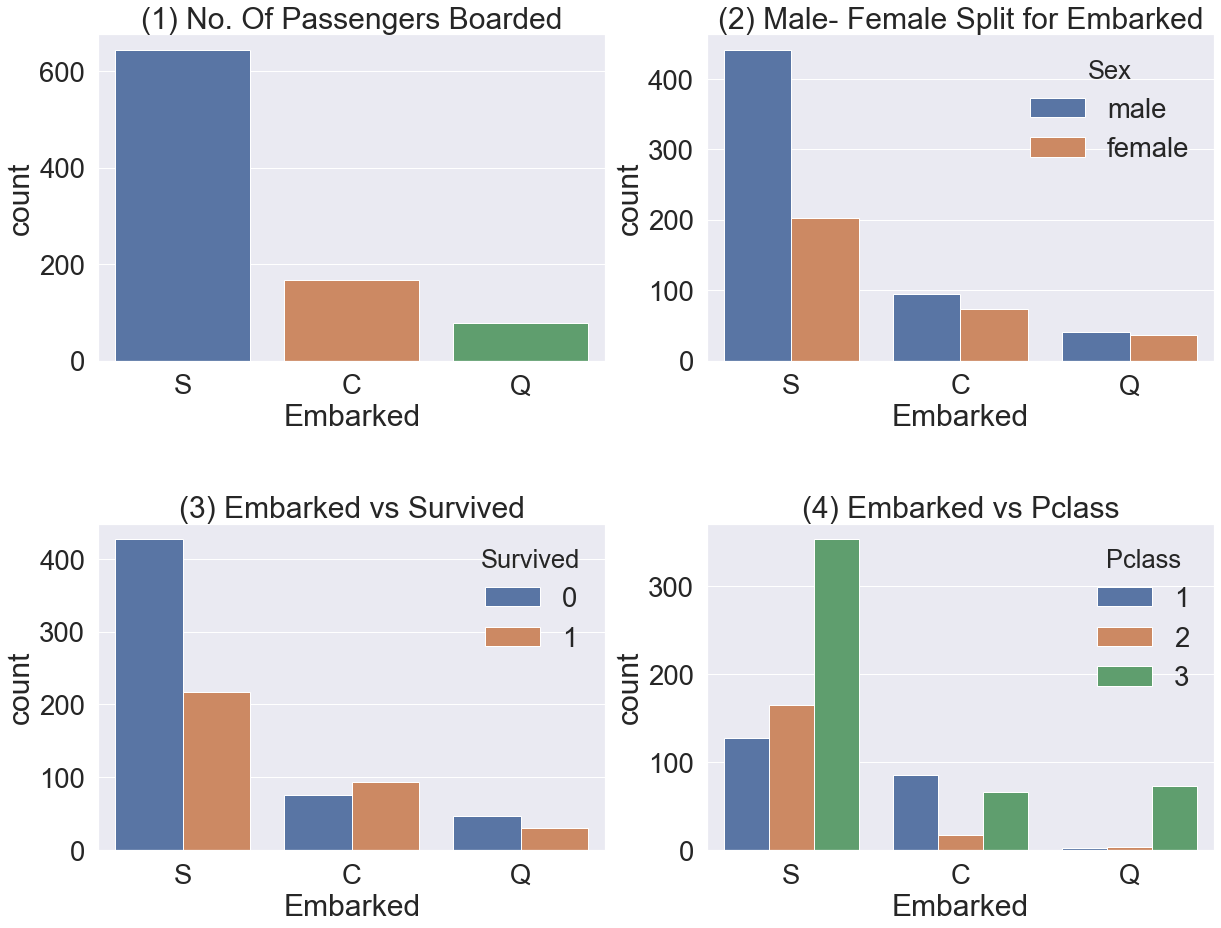

In [634]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked' ,hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male- Female Split for Embarked')

sns.countplot('Embarked',hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked' ,hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

또 다른 feature를 이용하여 split하여 4개의 표로 나누어 살펴보았다.
- Figure(1) - 전체적으로 봤을 때, S에서 가장 많은 사람이 탑승했었다.
- Figure(2) - C와 Q는 남녀의 비율이 비슷하고 S는 남자의 비율이 더 많았다는 것을 알 수 있다.  
  이유를 한번 찾아보면 좋을 것 같다.
- Figure(3) - 생존확률이 S의 경우 많이 낮다는 것을 알 수 있었다.
- Figure(4) - Class로 split해서 C가 생존확률이 높은건 C에 1st클래스의 사람들이 많이 탑승하였기 때문이라는 것을 알 수 있다.  
그러나 S는 3rd 클래스 승객이 많아서 생존확률이 낮은 것으로 보인다.
  

### 2.7 FAMILY - SIBSP + PARCH 
- 형제자매 + 부모자녀
- SibSp와 Parch를 합하면 Family가 된다. 가족단위로 합쳐서 분석해볼 것이다.

In [635]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 #자기 자신을 포함한 가족의 수로 계산해야한다. 
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [636]:
print("Maximum size of Family :",df_train['FamilySize'].max())
print("Minimum size of Family :",df_train['FamilySize'].min())

Maximum size of Family : 11
Minimum size of Family : 1


- 가족 구성원 수의 최대와 최소를 알아보았다.  
- Family Size와 생존의 관계성을 확인한다.

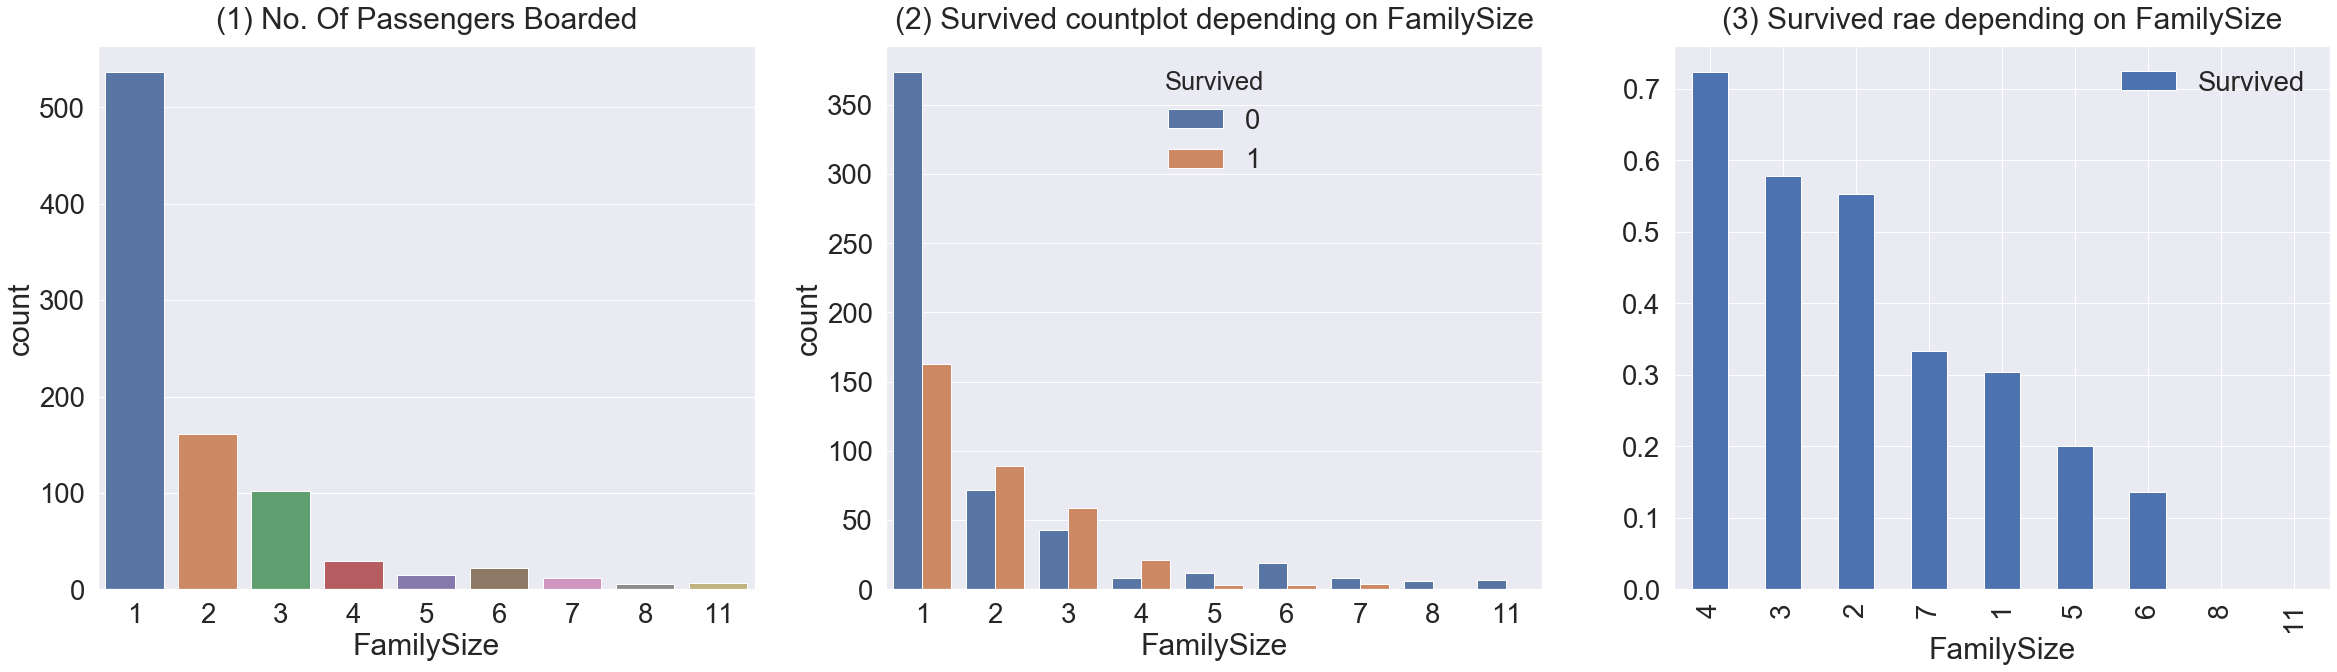

In [637]:
f, ax = plt.subplots(1,3,figsize=(40,10))

sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'],as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rae depending on FamilySize',y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 가족의 크기가 1부터 11까지 있음을 볼 수 있고 대부분 1인 고객이고 그 다음으로는 2~4인가구가 많다
- Figure(2),(3) - 가족 크기에 따른 생존률의 비교. 가족이 4명인 경우가 가장 생존 확률이 높은 것으로 보인다. 구성원의 수가 늘어날 수록
생존 확률이 낮아진다. 3~4인 가구에서 생존률이 높아진다는 것을 확인할 수 있었다.

### 2.8 FARE
- Fare는 탑승요금이며 contious feature 이다.

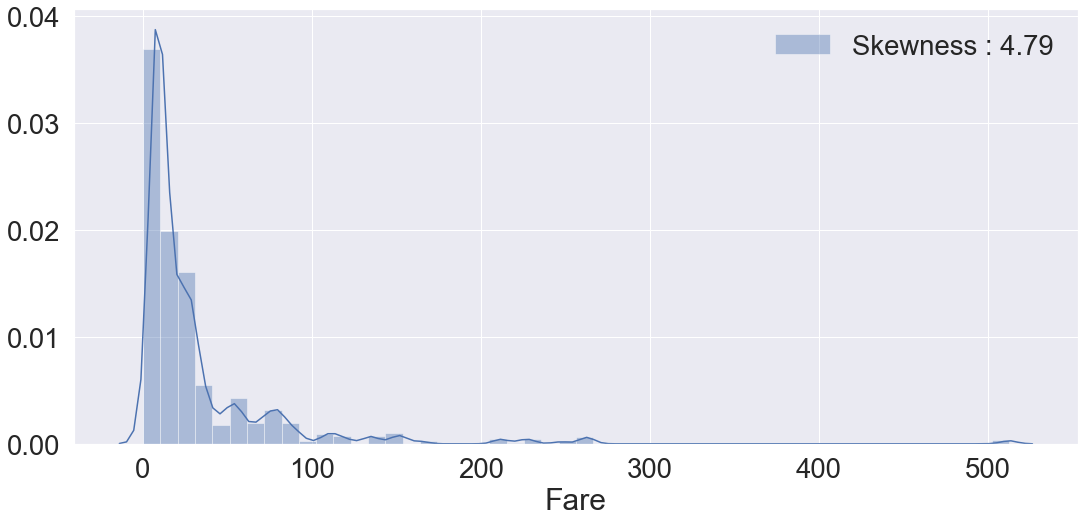

In [638]:
# 히스토그램 출력
f,ax = plt.subplots(1,1,figsize=(18,8))
g = sns.distplot(df_train['Fare'], color='b',label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

- 분포가 매우 비대칭임을 확인할 수 있다.(high skewness) 
- 만약 이대로 모델에 넣는다면 잘못 학습될 수도 있으므로 outlier에 대한 영향을 줄이도록 한다.

- outlier값의 영향을 줄이기 위해 Fare에 log를 취한다.  
pandas의 유용한 기능을 사용하여 작업을 수행한다. 

In [639]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean() 
#test데이터에 있는 nan value값을 평균값으로 대체하여 치환한다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

#### Pandas 유용한 기능 
- dataframe의 특정 columns에 공통된 작업을 적용하고 싶으면 map,apply를 사용하면 손쉽게 적용할 수 있다.
- 현재 이 과정에서 원하는 것은 Fare Columns의 데이터 모두를 log값을 치환하는 것인데 파이썬의 lambda 함수를 이용하여 로그를 적용하는 함수를 map에 인수로 넣어주면 Fare Columns 데이터에 그대로 적용이 된다. 매우 유용한 기능이니 숙지할 것!

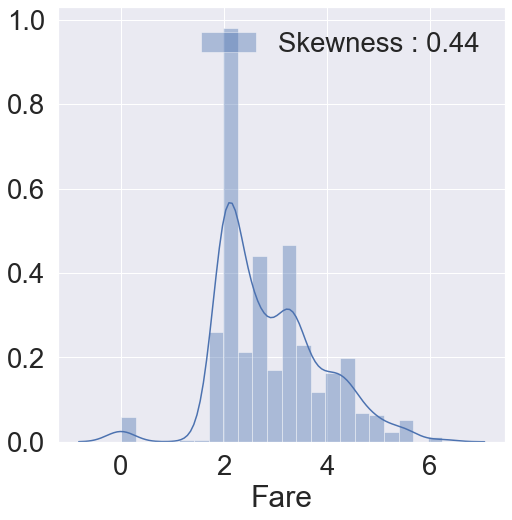

In [640]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log를 취하니 비대칭성이 꽤 사라진 것을 확인할 수 있었다.
- 이러한 작업을 통해 모델이 좀 더 좋은 성능을 내도록 할 수 있다.   

##### feature engineering
- 모델을 학습시키고 그 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것

### 2.9 CABIN 
- 이 Feature는 NaN이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻어내기 어려움 .
- 모델에 포함시키기에는 적합하지 않음 . 

In [641]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


### 2.10 TICKET
- 이 Feature는 NaN은 존재하지 않는다. string data이기 때문에 어떤 작업들을 해주어야 실제 모델에 사용할 수 있다.  
 그러기 위해서는 다양한 아이디어가 필요함.

In [642]:
df_train['Ticket'].value_counts()

347082      7
1601        7
CA. 2343    7
347088      6
CA 2144     6
           ..
21440       1
113509      1
PC 17475    1
350407      1
347067      1
Name: Ticket, Length: 681, dtype: int64

- Ticket number가 매우 다양하다. 어떤 특징을 이끌어내서 생존과 연결시킬 수 있을지 아이디어를 생각해내는 것이 본격적인 캐글 레이스의 시작점이라고 한다. 
- 어떤 특징이 있을지 연구해보자

2021/02/13 1차 필사 (2.3 ~ 2.10)  
추가로 찾아볼 것

plt.subplots()  
pd.crosstab()  
sns.factorplot/kdeplot/countplot/violinplot/distplot

# [2. 타이타닉 튜토리얼 2 - Exploratory data analysis, visualization, machine learning - 이유한](https://kaggle-kr.tistory.com/18?category=868316)

### 3. FEATURE ENGINEERING

- 본격적인 feature engineering 
- 제일 먼저 해야할 일은 null data를 채우는 것
- null data를 포함하는 feature의 statistics를 참고
- null data를 어떻게 채우느냐에 따라 모델의 성능 좌우
- Feature Engineering은 실제 모델의 학습에 쓰려고 하는 것, test에도 똑같이 적용해주어야 할 것.

### 3.1 FILL NULL 
### 3.1.1 Fill Null in Age using Title
- Age에는 null data가 177개나 존재
- title + statistics 를 사용하여 아이디어 도출
- 영어에서는 Miss, Mr, Mrs 같은 title이 존재한다.  
탑승객 이름 앞의 title을 이용하여 문제를 풀어보자.
- pandas series에는 data를 string으로 바꿔주는 str method, 거기에다 정규표현식을 적용시켜주는 extract method가 있다.
- 먼저 title을 Initial column 에 저장하자.

In [643]:
df_train['Initial'] = df_train.Name.str.extract('([A-za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-za-z]+)\.')

- pd의 crosstab을 이용하여 우리가 추출한 Initial과 Sex간의 count를 살펴보자.

In [644]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- 위 table을 참고하여 남여가 쓰는 Initial을 구분해 보았다.  
replace 메소드를 사용하여 특정데이터 값을 원하는 값으로 치환해준다

In [645]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

# 의미가 비슷한 호칭끼리 묶어 Miss,Mr,MRs,Other,Mr로 바꿔준다. 

In [646]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Miss,Mrs가 생존률이 높다는 것을 알 수 있다. 

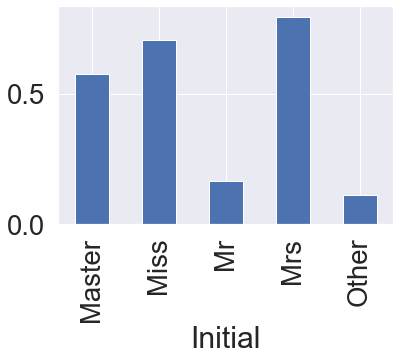

In [647]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- 본격적인 Null 채우기 작업 진행
- null data를 채우는 방법  
statistics 활용   
null data가 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측 후 채워넣는 방법 활용   
- 여기서 statistics는 train data의 것  
- test data는 unseen으로 둔 상태를 유지해야하며 train에서 얻은 statistics를 기반으로 test의 null data를 채워야한다.

In [648]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Age의 평균을 이용하여 Null Value를 채우도록 한다.
- pandas dataframe을 다룰 때에는 boolen array를 이용하여 indexing하는 방법이 가장 편리하다.
- isnull() 이면서 Initial이 Mr인 조건을 만족하는 Row(탑승객)의 'Age'값을 33으로 치환한다. 라는 코드를 여러개 짜볼 것이다.
- loc + boolen + column 을 사용해 값을 치환하는 방법(자주씀)

Initial 별 나이 평균   
Master - 5  
Miss - 22  
Mr - 33  
Mrs - 36  
Other - 46  

In [649]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'),'Age'] = 46

In [650]:
print('Age has ',sum(df_train['Age'].isnull()),'Null values')

Age has  0 Null values


[NUll을 채우는 더 다양한 방법을 제시하는 다른 커널](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)

### 3.1.2 FILL NULL IN EMBARKED

In [651]:
print('Embarked has ',sum(df_train['Embarked'].isnull()),'Null values')

Embarked has  2 Null values


- Embarked 는 Null Value 가 2개이고, S에서 가장 많은 탑승객이 있었으므로 간단하게 Null을 S로 채운다.
- dataframe의 fillna method를 이용하여 쉽게 채울 수 있다.  
여기서 inplace=True로 설정하면 df_train에 fillna를 실제로 적용할 수 있다.

In [652]:
df_train['Embarked'].fillna('S',inplace=True)

In [653]:
print('Embarked has ',sum(df_train['Embarked'].isnull()),'Null values')

Embarked has  0 Null values


### 3.2 CHANGE AGE (CONTINUOUS TO CATEGORICAL)

- Age는 현재 continuous feature이다. 이대로 사용해도 모델을 세울 수 있지만 Age를 몇 개의 group으로 나누어 category화 시켜줄 수도 있다.
- continuous를 categorical로 바꾸면 자칫 information loss 가 생길 수 있다. 따라서 주의해야함
- dataframe의 indexing 방법인 loc를 사용하여 직접해줄 수 있는 방법과 apply를 사용하여 넣는 방법도 있다.  

첫 번째, 나이를 10살 간격으로 나누어 loc을 사용하여 범주화 시킨다.

In [654]:
print('제일 나이 많은 탑승객 :{:.1f} Years '.format(df_train['Age'].max()))
print('제일 나이 적은 탑승객 :{:.1f} Years '.format(df_train['Age'].min()))
print('탑승객의 평균 나이 :{:.1f} Years '.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :80.0 Years 
제일 나이 적은 탑승객 :0.4 Years 
탑승객의 평균 나이 :29.8 Years 


최소 0~ 최대 80까지 7개의 범주를 만든다.

In [655]:
df_train['Age_category'] = 0

df_train.loc[df_train['Age']<10, 'Age_category'] = 0
df_train.loc[(10 <= df_train['Age'])&(df_train['Age']<20),'Age_category'] = 1
df_train.loc[(20 <= df_train['Age'])&(df_train['Age']<30),'Age_category'] = 2
df_train.loc[(30 <= df_train['Age'])&(df_train['Age']<40),'Age_category'] = 3
df_train.loc[(40 <= df_train['Age'])&(df_train['Age']<50),'Age_category'] = 4
df_train.loc[(50 <= df_train['Age'])&(df_train['Age']<60),'Age_category'] = 5
df_train.loc[(60 <= df_train['Age'])&(df_train['Age']<70),'Age_category'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_category'] = 7

df_test.loc[df_test['Age']<10, 'Age_category'] = 0
df_test.loc[(10 <= df_test['Age'])&(df_test['Age']<20),'Age_category'] = 1
df_test.loc[(20 <= df_test['Age'])&(df_test['Age']<30),'Age_category'] = 2
df_test.loc[(30 <= df_test['Age'])&(df_test['Age']<40),'Age_category'] = 3
df_test.loc[(40 <= df_test['Age'])&(df_test['Age']<50),'Age_category'] = 4
df_test.loc[(50 <= df_test['Age'])&(df_test['Age']<60),'Age_category'] = 5
df_test.loc[(60 <= df_test['Age'])&(df_test['Age']<70),'Age_category'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_category'] = 7

두 번째, 나이를 10살 간격으로 나누어 범주 값을 리턴하는 함수를 만든 후 apply 메소드에 넣어주는 방법.

In [656]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_category_2'] = df_train['Age'].apply(category_age)

In [657]:
df_train['Age_category']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_category, Length: 891, dtype: int64

In [658]:
df_train['Age_category_2']

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age_category_2, Length: 891, dtype: int64

- 두 가지 방법이 같은 결과를 가지고 있는지 확인한다.  
Series 간 boolen 비교 후 all()매소드를 사용하여 확인한다.  
all() 메소드는 모든 값이 True면 True , False면 False로 리턴해준다. 

In [659]:
print((df_train['Age_category'] == df_train['Age_category_2']).all())

True


- 중복되는 칼럼 제거

In [660]:
df_train.drop(['Age', 'Age_category_2'],axis=1, inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

#이제부터 Age -> Age_category로 사용 

In [661]:
print('Age has ',sum(df_train['Age_category'].isnull()),'Null values')

Age has  0 Null values


### 3.3 CHANGE INITIAL , EMBARKED AND SEX (STRING TO NUMERICAL)
- 현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져 있다.  
이런 카테고리로 표현되어져있는 데이터를 모델에 인풋해줄 때 우리가 해야할 것은 컴퓨터가 인식할 수 있도록 수치화해주어야한다.  
- map method를 사용하여 간단하게 수행할 수 있다. 
- 사전 순서대로 정리하여 mapping 할 것이다. 
- ex) Male / Female => 0 , 1 

In [662]:
df_train['Initial'] = df_train['Initial'].map({ 'Master':0,'Miss':1,'Mr':2, 'Mrs':3, 'Other':4 })
df_test['Initial'] = df_test['Initial'].map({ 'Master':0,'Miss':1,'Mr':2, 'Mrs':3, 'Other':4})

In [663]:
df_train['Initial']

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Initial, Length: 891, dtype: int64

- Embarked도 C,Q,S로 이루어져 있다. map을 이용해 0,1,2로 수치화해주자.
- 특정 column에 어떤 값들이 있는 지 확인을 먼저해야한다.  
간단히 unique() 메소드를 사용하거나 value_counts()를 써서 count까지 보는 방법이 있다.

In [664]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [665]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

- 위 두 방법을 사용해 Embarked S,C,Q 세 가지로 이루어진 것을 볼 수 있다. 이제 mapping 하면 된다. 

In [666]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [667]:
df_train['Embarked'].isnull().any()

False

- 한번 Null 이 사라졌는지 확인해보자.  
- Embarked Column만 가져온 것은 하나의 pandas의 Series 객체므로, isnull() 메소드를 사용해 Series의 값들이 null 인지 아닌지에 대한 boolean 값을 얻을 수 있다.
- 그리고 여기에 any() 를 사용하여, True 가 단하나라도 있을 시(Null이 한개라도 있을 시) True 를 반환한다. 
- Null 을 S로 다 바꿔주었으므로 False 를 얻게 된다.

In [668]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

- 성별 데이터도 수치화 해준다. 

##### feature 간의 상관관계 분석하기
- 두 변수간의 피어슨 상관계수를 구하면 (-1, 1) 사이의 값을 얻을 수 있는데 1과 -1에 가까울 수록 양 ,음의 상관관계를 가지며 0에 가까울수록 상관관계가 없다는 것을 의미한다. 
- 여러 feature를 한꺼번에 matrix형태로 묶어 상관관계를 분석한다.
- dataframe의 corr() 메소드와 seaborn을 활용하여 heatmap plot을 출력하여 분석하도록 하자.

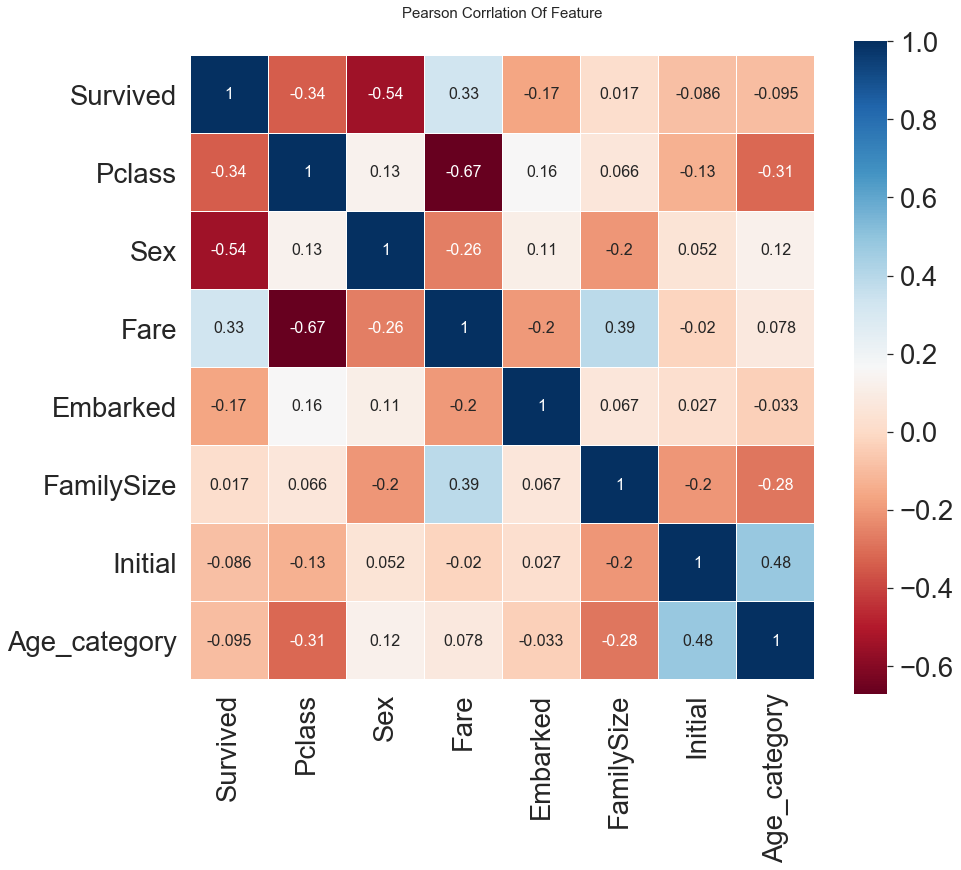

In [669]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_category']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corrlation Of Feature', y=1.05 , size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0, square=True , cmap =colormap , linecolor = 'white', annot=True , annot_kws={"size":16})

del heatmap_data

- 우리가 EDA에서 살펴봤듯이, Sex와 Pclass 가 Survived에 상관관계가 어느 정도 있음을 볼 수 있다. 
- 생각보다 fare와 Embarked도 상관관계가 있음을 볼 수 있다.
- 그러나 서로 강한 상관관계를 가지는 (1에 거의 근접한) feature들은 없다.
- 다음으로 data preprocessing 를 진행할 것이다.

### 3.4 ONE-HOT ENCORDING ON INITIAL AND EMBARKED
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 on-hot encoding을 해줄 수 있다. 
- 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말함.
- one hot encording은 위 카데고리를 (0 , 1)로 이루어진 5차원의 벡터로 나타내는 것을 말한다. 
- pandas의 get_dummies를 사용하여 해결할 수 있다. 
- Initial 을 prefix로 두어서 구분하기 쉽게 만들어 준다.

In [670]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix='Initial')

In [671]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_category,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [672]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix='Embarked')

- 아주 쉽게 원핫인코딩을 적용한 모습
- sklearn으로 Labelencorder + OneHotencorder 를 이용해도 one-hot encording이 가능합니다.
- 가끔 category 가 100개가 넘어가는 경우가 있는데 이때 one-hot encoding을 사용하면 column이 100개가 생겨, 학습시 매우 버거울 경우가 있다.

### 3.5 DROP COLUMNS
- 이제 필요한 colums만 남기고 다 삭제한다.

In [673]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [674]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_category,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [675]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_category,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3.0,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4.0,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6.0,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2.0,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2.0,0,0,0,1,0,0,0,1


- train의 Survived feature (타겟 클래스)를 빼면 train, test 둘다 같은 columns를 가진 것을 확인할 수 있다. 

### 4. BUILDING MACHINE LEARNING MODEL AND PREDICTION USING THE TRAINED MODEL
- 이제 준비가 다 되었다. sklearn를 사용해 본격적으로 머신러닝 모델을 만들어 보자. 

In [676]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 기법 
from sklearn import metrics #모델의 평가를 위해 사용
from sklearn.model_selection import train_test_split #training set을 쉽게 나눠주는 함수

- Sklearn 은 머신러닝의 처음부터 끝까지가 다 있다. feature engineering, preprocessing, 지도 학습 알고리즘, 비지도 학습 알고리즘, 모델 평가, 파이프라인 등 머신러닝에 관련된 모든 작업들이 손쉬운 인터페이스로 구현되어 있다. 데이터 분석 + 머신러닝을 하고싶다면, 이 라이브러리는 반드시 숙지해야함.

-  타이타닉 문제는 target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) binary classfication 문제이다.
-  train set 의 survived를 제외한 input 을 가지고 모델을 최적화시켜서 각 샘플(탑승객)의 생존유무를 판단하는 모델을 만들어 낸다.
그 후 모델이 학습하지 않았던 test set 을 input 으로 주어서 test set 의 각 샘플(탑승객)의 생존 유무를 예측해본다.

### 4.1 PREPARATION - SPLIT DATASET INTO TRAIN, VALID, TEST SET
- 가장 먼저, 학습에 쓰일 데이터 target label(Survived)를 분리한다. drop을 사용해 간단히 할 수 있다.

In [677]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

- 보통 train, test 만 언급되지만, 실제 좋은 모델을 만들기 위해서 valid set을 따로 만들어 모델 평가를 해볼 것이다.
- train_test_split 을 사용하여 쉽게 train 셋을 분리할 수 있다.

In [678]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3 , random_state = 2018)

#### Sklearn 에서는 여러 머신러닝 알고리즘을 지원해준다. [documentation 참고](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) 
- 본 튜토리얼에서는 랜덤포레스트 모델을 사용하도록 한다.
- 랜덤포레스트는 결정트리기반 모델이며, 여러 결정 트리들을 앙상블한 모델이다.
- 각 머신러닝 알고리즘에는 여러 파라미터들이 있다.
- 랜덤포레스트분류기도 n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf 등 여러 파라미터들이 존재하며, 이것들이 어떻게 세팅되냐에 따라 같은 데이터셋이라 하더라도 모델의 성능이 달라진다.
- 파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요하다. 
- 기본 default 세팅으로 진행하고 모델 객체를 만들고, fit 메소드로 학습시킨다.  
그 후 valid set input 을 넣어주어 예측값(X_vld sample(탑승객)의 생존여부)를 얻는다.

### 4.2 MODEL GENERATION AND PREDICTION

In [679]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr) #모델 세우기
prediction = model.predict(X_vld) #모델 예측하기

In [680]:
#모델 평가하기
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


### 4.3 FEATURE IMPORTANCE
- 학습된 모델은 feature importance를 가지게 되는데 이것을 확인하여 지금 만든 모델이 어떤 feature에 영향을 많이 받았는지 확인할 수 있다.
- 학습된 모델은 기본적으로 feature importances를 가지고 있어서 쉽게 그 수치를 얻을 수 있다.
- pandas series를 이용하면 쉽게 sorting하여 그래프를 그릴 수 있다. 

In [681]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

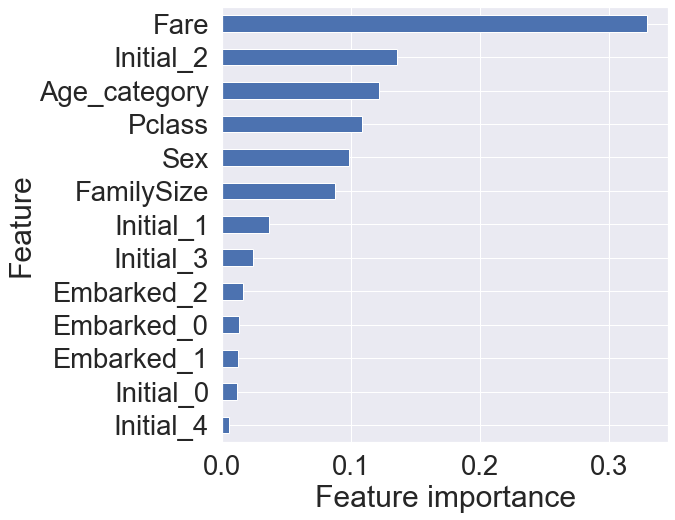

In [682]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 위에서 얻은 모델에서는 Fare 가 가장 큰 영향력을 가지며, 그 뒤로 Initial_2, Age_cat, Pclass가 차례로 중요도를 가진다. 
- feature importance 는 지금 모델에서의 importance 를 나타낸다. 만약 다른 모델을 사용하게 된다면 feature importance 가 다르게 나올 수 있다.
- 이 feature importance 를 보고 실제로 Fare 가 중요한 feature 일 수 있다고 판단을 내릴 수는 있지만, 이것은 결국 모델에 귀속되는 하나의 결론이므로 통계적으로 좀 더 살펴보아야한다.
- featuure importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있다.

### 4.4 PREDICTION ON TEST SET
- 이제 모델이 학습하지 않았던 테스트 셋을 모델에 주어서 생존 여부를 예측해보겠다.
- 이 결과는 실제 제출용이므로 결과는 leaderboard에서 확인하면 된다.

In [683]:
submission = pd.read_csv('./gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [684]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [685]:
submission.to_csv('./my_first_submission.csv', index=False)

### 5. CONCLUSION
- 캐글에 제출 (2021/02/14)

Score는  0.74401이 나온다.

-Your First Entry   
Welcome to the leaderboard!  
Your score represents your submission's accuracy. For example, a score of 0.7 in this competition indicates you predicted Titanic   survival correctly for 70% of people.  

What next? You’ve got a few options:  
💪Learn skills that can improve your score in our Intro to Machine Learning course by Dan Becker.  
🔍Check out the discussion forum to find lots of tutorials and insights from other competitors.  
🏆Find a new challenge by entering one of our open, active competitions or searching our public datasets.  